## Predicting House Prices

In this notebook i'll be implementing a linear regression model for predicting housing prices.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
#sanple
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3780,-118.39,34.17,26.0,6429.0,1611.0,2806.0,1491.0,3.1929,265200.0,<1H OCEAN
7206,-118.18,34.02,33.0,832.0,226.0,987.0,220.0,3.0972,125000.0,<1H OCEAN
14474,-117.23,32.85,25.0,4229.0,601.0,1634.0,574.0,6.3955,316700.0,NEAR OCEAN
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,92900.0,INLAND
14513,-117.15,32.91,10.0,2349.0,431.0,1598.0,435.0,4.8229,183200.0,<1H OCEAN


### clean the data

The column headers are properly sorted but let's convert all string data to lower case to ensure uniformity

In [4]:
data.dtypes[data.dtypes == 'object'].index

Index(['ocean_proximity'], dtype='object')

In [5]:
#convert all strings to lower case and remove spacing
data["ocean_proximity"] = data["ocean_proximity"].str.lower().str.replace(' ', '_').replace('<1h_ocean', 'less_than_hundred_mile_to_ocean')

In [6]:
# select random sample
data.sample(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18020,-121.95,37.24,32.0,1382.0,239.0,705.0,251.0,6.0957,405400.0,less_than_hundred_mile_to_ocean
10631,-117.79,33.73,3.0,8240.0,1410.0,3318.0,1270.0,7.2074,291300.0,less_than_hundred_mile_to_ocean
10793,-117.92,33.62,35.0,1821.0,335.0,727.0,316.0,6.5842,458500.0,less_than_hundred_mile_to_ocean
9618,-120.46,37.29,30.0,2972.0,635.0,1940.0,590.0,2.3594,72300.0,inland
14250,-117.09,32.72,33.0,1096.0,240.0,716.0,224.0,1.6944,111800.0,near_ocean
16346,-121.34,38.03,12.0,2707.0,433.0,1200.0,380.0,4.9861,133500.0,inland


### EDA

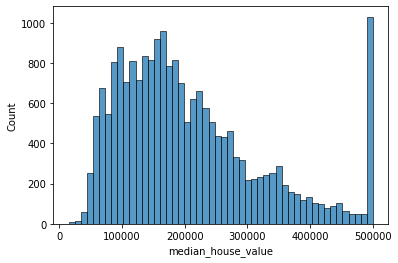

In [7]:
# checking the median house value column
sns.histplot(data['median_house_value'], bins=50);

the plot doesn't portray a long tail distribution. it'd be best to get the log values of the data

In [8]:
median_house_value_log_vals = np.log1p(data['median_house_value'])

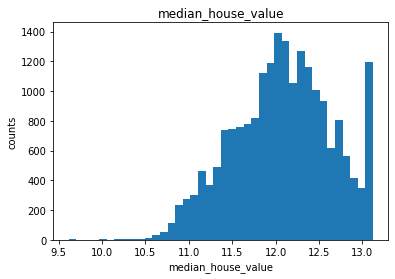

In [9]:
plt.hist(median_house_value_log_vals, bins=40);
plt.title('median_house_value');
plt.xlabel('median_house_value');
plt.ylabel('counts');

In [10]:
# columns of intrest
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']

In [11]:
df = data[columns].copy() 

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

variable with missing value is **total_bedrooms** with **207** values missing

In [14]:
np.median(df['population'])

1166.0

The **median** for the population column is **1166**

### splitting the dataset

Split into 60%(train) 20%(val) 20%(test)

In [15]:
data = len(df)

val_data = int(data * 0.2)
test_data = int(data * 0.2)
train_data = data - val_data - test_data

data, val_data, test_data, train_data

(20640, 4128, 4128, 12384)

In [16]:
idx = np.arange(data)

In [17]:
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
# splitting here
data_train = df.iloc[idx[:train_data]]
data_val = df.iloc[idx[train_data:train_data+val_data]]
data_test = df.iloc[idx[train_data+val_data:]]

data_train.shape, data_test.shape, data_val.shape

((12384, 9), (4128, 9), (4128, 9))

In [19]:
data_train.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15548,-117.09,33.12,11.0,567.0,184.0,620.0,163.0,2.5284,122500.0
18424,-121.81,37.25,12.0,2070.0,587.0,1216.0,532.0,4.1926,244500.0
17054,-122.25,37.47,38.0,645.0,124.0,265.0,103.0,5.4688,305000.0
16037,-122.46,37.72,45.0,2399.0,419.0,1225.0,399.0,4.0855,244100.0
4880,-118.25,34.03,52.0,1274.0,418.0,1655.0,368.0,2.1905,124000.0


In [20]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [21]:
data_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0


In [22]:
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

In [23]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [24]:
del data_train["median_house_value"]
del data_val["median_house_value"]
del data_test["median_house_value"]

In [25]:
y_train[:10]

array([10.77270764, 10.7320612 , 13.12236738, 12.29500343, 12.53537999,
       11.97477721, 12.19703695, 11.96718709, 12.73670384, 13.00942086])

Handling missing values

In [26]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [27]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [28]:
# train a model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
def prepare_X(df, fill_with=0):
    df_num = df[columns]
    df_num = df_num.fillna(fill_with)
    X = df_num.values
    return X

In [30]:
# build the rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
# filling with 0
X_train = prepare_X(data_train,fill_with=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

In [32]:
round(rmse(y_val, y_pred), 2)

0.33

Filling with **zero** gives **0.33**

In [33]:
mean_for_bedrooms = data_train['total_bedrooms'].mean()
mean_for_bedrooms

533.4803317730147

In [34]:
# filling with mean
X_train = prepare_X(data_train,fill_with=mean_for_bedrooms)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred = w0 + X_val.dot(w)

In [35]:
round(rmse(y_val, y_pred),2)

0.33

Filling with **mean of bedrooms** gives **0.33**

In [36]:
# Question 4
# peforming regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
X_train = prepare_X(data_train,fill_with=0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(data_val,fill_with=0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print('r = {} and rmse = {}'.format(r, score))

r = 0 and rmse = 0.33
r = 1e-06 and rmse = 0.33
r = 0.0001 and rmse = 0.33
r = 0.001 and rmse = 0.33
r = 0.01 and rmse = 0.33
r = 0.1 and rmse = 0.33
r = 1 and rmse = 0.33
r = 5 and rmse = 0.34
r = 10 and rmse = 0.34


In [38]:
# Question 5
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
data, val_data, test_data, train_data

(20640, 4128, 4128, 12384)

In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [41]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [50]:
scores = []
for seed in seeds:
    # set the seed
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # split the dataset
    df_train = df.iloc[idx[:train_data]]
    df_val = df.iloc[idx[train_data:train_data+val_data]]
    df_test = df.iloc[idx[train_data+val_data:]]
    
    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # get all median house values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # remove prediction column
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # prepare the train feature matrix and fill missing column(s) to with 0
    X_train = prepare_X(df_train,fill_with=0)
    w0, w = train_linear_regression(X_train, y_train)

    # prepare validation feature matrix
    X_val = prepare_X(df_val, fill_with=0)
    y_pred = w0 + X_val.dot(w)
    
    # rmse score
    score = round(rmse(y_val, y_pred),2)
    scores.append(score)
    
    print('seed={} -- rmse={}'.format(seed, score))

seed=0 -- rmse=0.35
seed=1 -- rmse=0.35
seed=2 -- rmse=0.34
seed=3 -- rmse=0.34
seed=4 -- rmse=0.34
seed=5 -- rmse=0.35
seed=6 -- rmse=0.34
seed=7 -- rmse=0.34
seed=8 -- rmse=0.34
seed=9 -- rmse=0.34


In [51]:
std = round(np.std(scores), 3)
std

0.005

I had to run it multiple times to arrive at 0.005.

In [52]:
# Question 6
np.random.seed(9)
np.random.shuffle(idx)

# split the dataset
df_train = df.iloc[idx[:train_data]]
df_val = df.iloc[idx[train_data:train_data+val_data]]
df_test = df.iloc[idx[train_data+val_data:]]

# combine train and test
df_full_train = pd.concat([df_train, df_val])

# reset index
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# get all median house values
y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# remove prediction column
del df_full_train['median_house_value']
del df_test['median_house_value']

In [53]:
len(df_full_train), len(df_test)

(16512, 4128)

In [54]:
X_full_train = prepare_X(df_full_train, fill_with=0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fill_with=0)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 5)

In [55]:
score

0.34666

The rmse score is **0.34666**, apprroximately(round up to two decimal places) it is **0.35**